Import the data and examine the head and columns

In [23]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(open('police_killings.csv', encoding='latin-1'))

In [10]:
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


Get the total counts for each racial grouping

In [37]:
ethnicity_count = data.groupby('raceethnicity').size()
ethnicity_count

raceethnicity
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
dtype: int64

Find the relative % for each racial grouping

In [36]:
ethnicity_percentage = ethnicity_count/len(data)
ethnicity_percentage

raceethnicity
Asian/Pacific Islander    0.021413
Black                     0.289079
Hispanic/Latino           0.143469
Native American           0.008565
Unknown                   0.032120
White                     0.505353
dtype: float64

How do the killings compare with the overall US breakdown of population by race?

In [42]:
mapping = { 
    'Asian/Pacific Islander': 15159516 + 674625, 
    'Native American': 3739506, 
    'Black': 40250635, 
    'Hispanic/Latino': 44618105, 
    'White': 197318956 }

ethnicity_compare = pd.DataFrame(
    {'killing_pct': ethnicity_percentage, 
    'population_pct':{k: v*1.0/sum(mapping.values()) for k , v in mapping.items()}
    })


,killing_pct,population_pct
Asian/Pacific Islander,0.021413,0.052472
Black,0.289079,0.133386
Hispanic/Latino,0.143469,0.147859
Native American,0.008565,0.012392
Unknown,0.032120,NaN
White,0.505353,0.653891


Graph the killings by race using a bar chart. Make sure to label the graph and axes

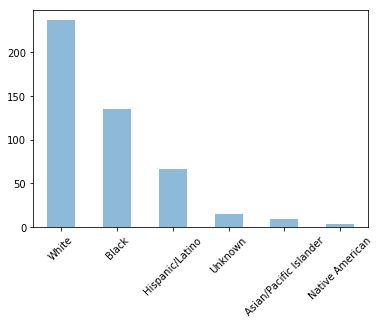

In [18]:
data['raceethnicity'].value_counts().plot(kind='bar', alpha = .5, rot=45)

Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)

In [24]:
# Clean up the data: remove '-' and convert to int

data['p_income']=data['p_income'].map(lambda x: None if x == '-' else int(x))

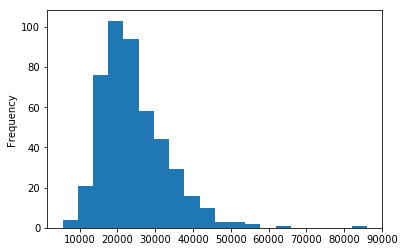

In [43]:
data['p_income'].plot.hist(bins=20)

Calculate the median "p_income"

In [44]:
p_income_mean = data['p_income'].mean()
p_income_mean

24308.96559139785

Find the total killings per each state

In [47]:
state_breakdown = data.groupby('state').size()
state_breakdown.head()

state
AK     2
AL     8
AR     4
AZ    25
CA    74
dtype: int64

 Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic"
 
 Convert the values in those columns to float types

In [67]:
clean_data = data[['state','pop','county_income','share_white','share_black','share_hispanic']]
clean_data[['share_white','share_black','share_hispanic']] = clean_data[['share_white','share_black','share_hispanic']].applymap(lambda x: None if x == '-' else float(x))
clean_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,state,pop,county_income,share_white,share_black,share_hispanic
0,AL,3779,54766,60.5,30.5,5.6
1,LA,2769,40930,53.8,36.2,0.5
2,WI,4079,54930,73.8,7.7,16.8
3,CA,4343,55909,1.2,0.6,98.8
4,OH,6809,49669,92.5,1.4,1.7


Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets

lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]

highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [91]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

clean_data_lowest = clean_data['state'].isin(lowest_states)
clean_data_highest = clean_data['state'].isin(highest_states)

summary = pd.DataFrame([
    [clean_data[clean_data_lowest]['pop'].mean(), clean_data[clean_data_highest]['pop'].mean()], 
    [clean_data[clean_data_lowest]['county_income'].mean(), clean_data[clean_data_highest]['county_income'].mean()],
    [clean_data[clean_data_lowest]['share_white'].mean(), clean_data[clean_data_highest]['share_white'].mean()],
    [clean_data[clean_data_lowest]['share_black'].mean(), clean_data[clean_data_highest]['share_black'].mean()],
    [clean_data[clean_data_lowest]['share_hispanic'].mean(), clean_data[clean_data_highest]['share_hispanic'].mean()]],
    columns = ['lowest','highest'],
    index = ['pop_mean','county_income_mean','share_white_mean','share_black_mean','share_hispanic_mean']
).transpose()
summary



,pop_mean,county_income_mean,share_white_mean,share_black_mean,share_hispanic_mean
lowest,4127.947368,54761.473684,60.616071,21.257143,12.948214
highest,4269.344086,48702.172043,55.652174,11.532609,20.693478
